In [1]:
# Dependencies

import os
import glob
import random
import numpy as np


import pydicom
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt

In [221]:
# Utils

def sort_DcmFiles(dcm_paths):
    
    sorted_dcm_paths = ['' for i in range(len(dcm_paths))]
    
    for path in dcm_paths:
        dataset = pydicom.dcmread(path)
        sorted_dcm_paths[int(dataset.InstanceNumber) - 1] = path
        
    return sorted_dcm_paths


def image_3D(sorted_paths, rows, cols):
    
    image_array = np.zeros((len(sorted_paths), rows, cols))
    
    for n, path in enumerate(sorted_paths):
        dataset = pydicom.dcmread(path)
        image_array[n] = dataset.pixel_array
        
    return image_array


def get_PatientInfo(dcm_FilePath):
    
    dataset = pydicom.dcmread(dcm_FilePath)
    print("Patient id.......:", dataset.PatientID)
    print("Patient Sex.......:", dataset.PatientSex)
    print("Patient Weight.......:", dataset.PatientWeight)
    print("Acquisition Date.......:", dataset.AcquisitionDate)
    print("Pregnancy Status.......:", dataset.PregnancyStatus)
    print("Patient BirthDate.......:", dataset.PatientBirthDate)
    print("Image shape.......:", dataset.pixel_array.shape)
    print("Modality.........:", dataset.Modality)
    print("Study Date.......:", dataset.StudyDate)
    plt.imshow(dataset.pixel_array, cmap='gray')
    plt.show()
    
    return dataset.pixel_array.shape
    
def plot_3DImage(image_array, cols=5, plot_size=(30,30)):
    
    rows = image_array.shape[0] // cols + 1
    fig = plt.figure(figsize=plot_size)
    
    for n, image in enumerate(image_array):
        
        ax = fig.add_subplot(rows, cols, n+1)
        ax.imshow(image, cmap='gray')
        plt.subplots_adjust(wspace=0.35, hspace=0.35)
        plt.title("slice_" + str(n))

In [222]:
base_path = '../JFRDataChallenge/jfr/Dataset 1/'
patient = '12916/'
dcm_paths = glob.glob(base_path + patient + '/*.dcm')
sorted_paths = sort_DcmFiles(dcm_paths)

In [227]:
glob.glob('../JFRDataChallenge/jfr/Dataset 1/*/').split('/')

AttributeError: 'list' object has no attribute 'split'

In [ ]:
patient = random.choice(glob.glob)

Patient id.......: 0080008
Patient Sex.......: M
Patient Weight.......: 87
Acquisition Date.......: 20150325
Pregnancy Status.......: 0
Patient BirthDate.......: 19670101
Image shape.......: (240, 240)
Modality.........: MR
Study Date.......: 20150325


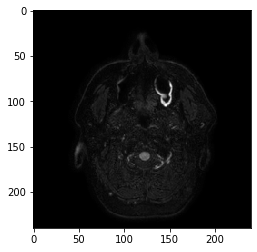

In [224]:
# Get patient information 
rows, cols, = get_PatientInfo(sorted_paths[0])

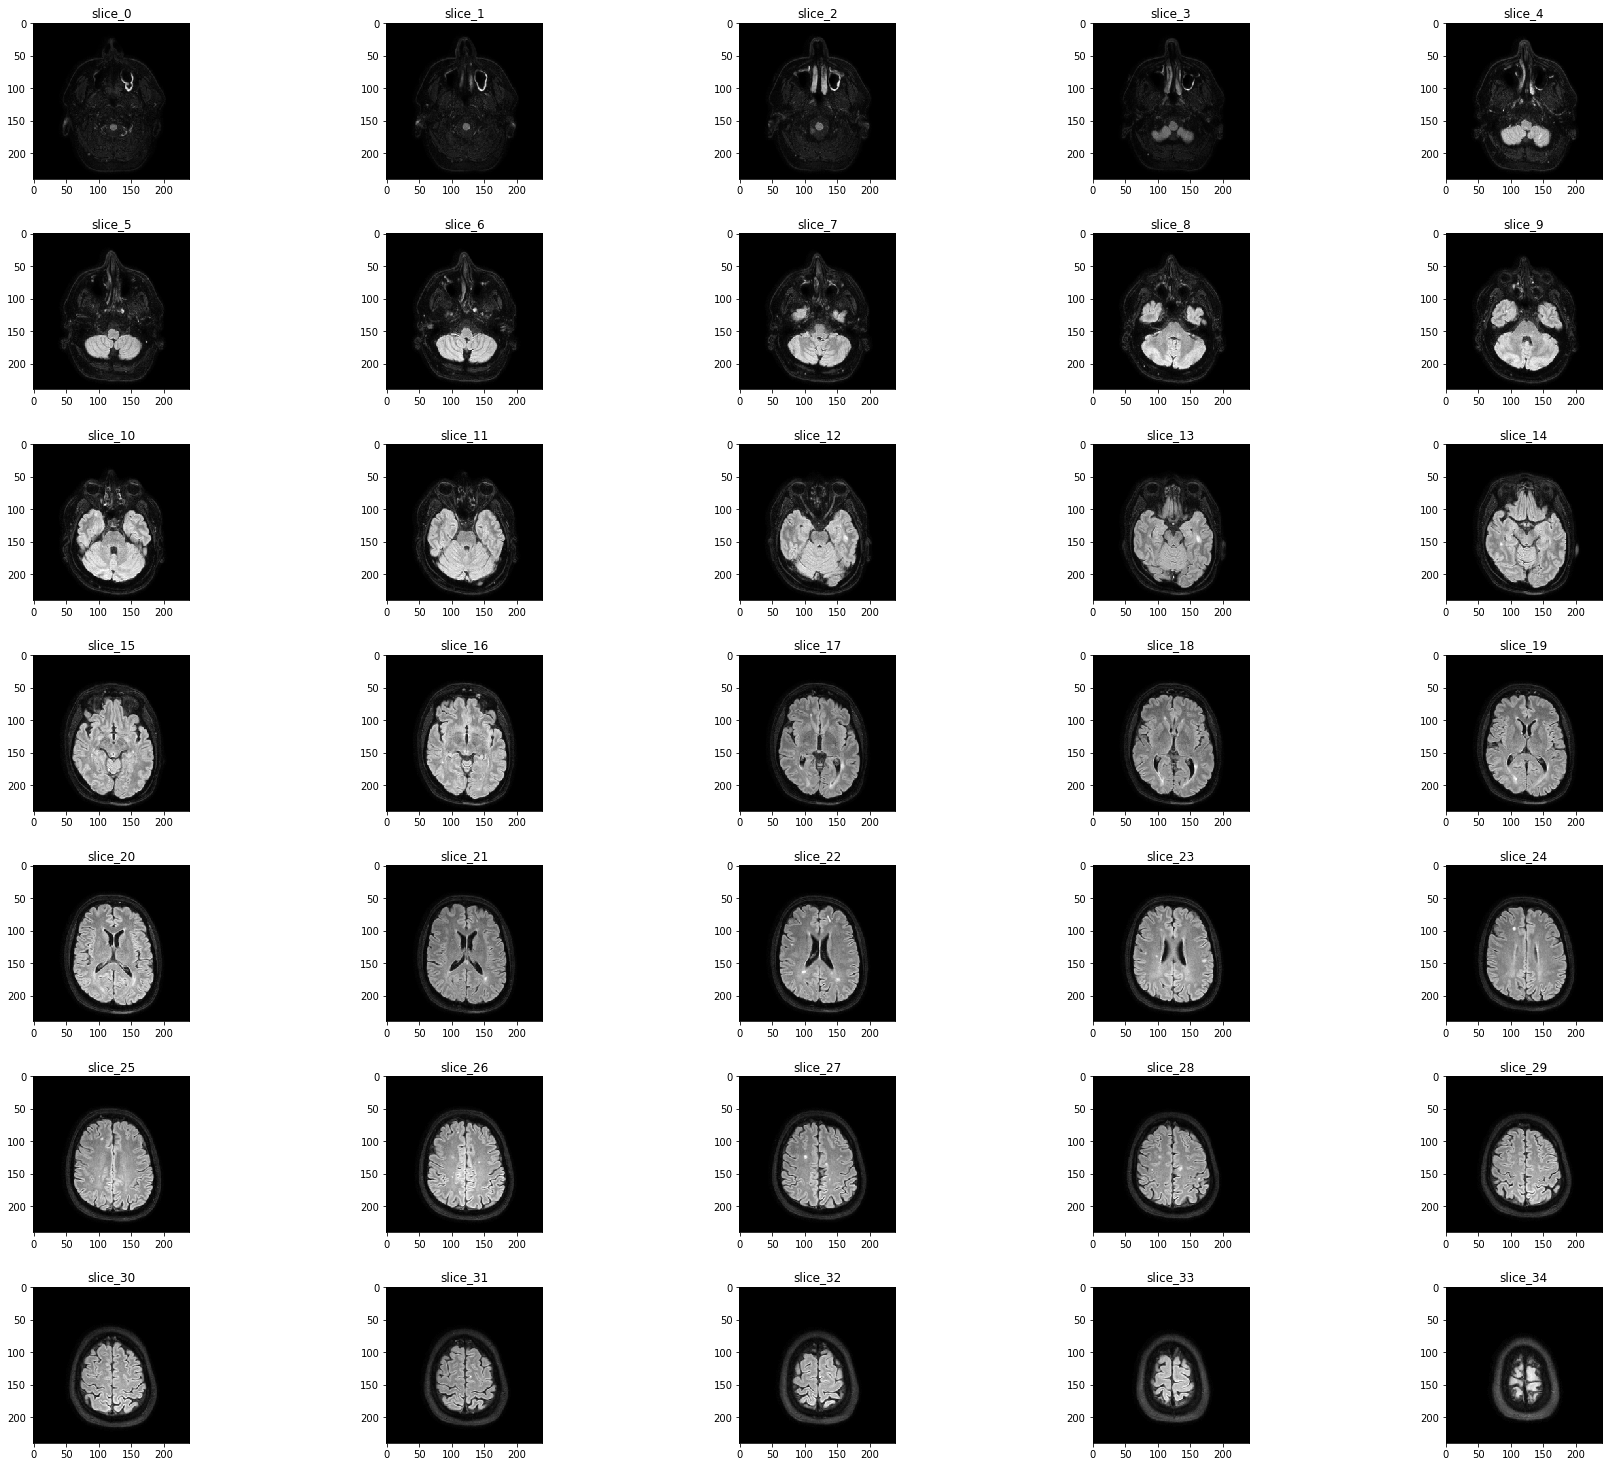

In [225]:
# Plot patient MRI images
image_array = image_3D(sorted_paths, rows, cols)
plot_3DImage(image_array)

In [144]:
base_path = '../JFRDataChallenge/jfr/Dataset 1/'
patient = '12916/'
dcm_paths = glob.glob(base_path + patient + '/*.dcm')
sorted_paths = sort_DcmFiles(dcm_paths)

Instance number / Total instance .. 11/ 35
Patient Sex.......: M
Patient Weight.......: 87
Acquisition Date.......: 20150325
Pregnancy Status.......: 0
Patient BirthDate.......: 19670101
Image shape.......: (240, 240)
Patient id.......: 0080008
Modality.........: MR
Study Date.......: 20150325


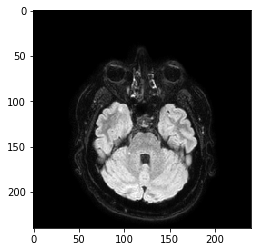

In [153]:
dcm_FilePath = sorted_paths[10] #random.choice(paths)#base_path + patient + dcm_FileName
dataset = pydicom.dcmread(dcm_FilePath)

print("Instance number / Total instance .. {}/{}".format(str(dataset.InstanceNumber), str(dataset[0x2001, 0x1018])[-3:]))
#print("Path index .....:",paths.index(dcm_FilePath) )
print("Patient Sex.......:", dataset.PatientSex)
print("Patient Weight.......:", dataset.PatientWeight)
print("Acquisition Date.......:", dataset.AcquisitionDate)
print("Pregnancy Status.......:", dataset.PregnancyStatus)
print("Patient BirthDate.......:", dataset.PatientBirthDate)
print("Image shape.......:", dataset.pixel_array.shape)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)
plt.imshow(dataset.pixel_array, cmap='gray')
plt.show()

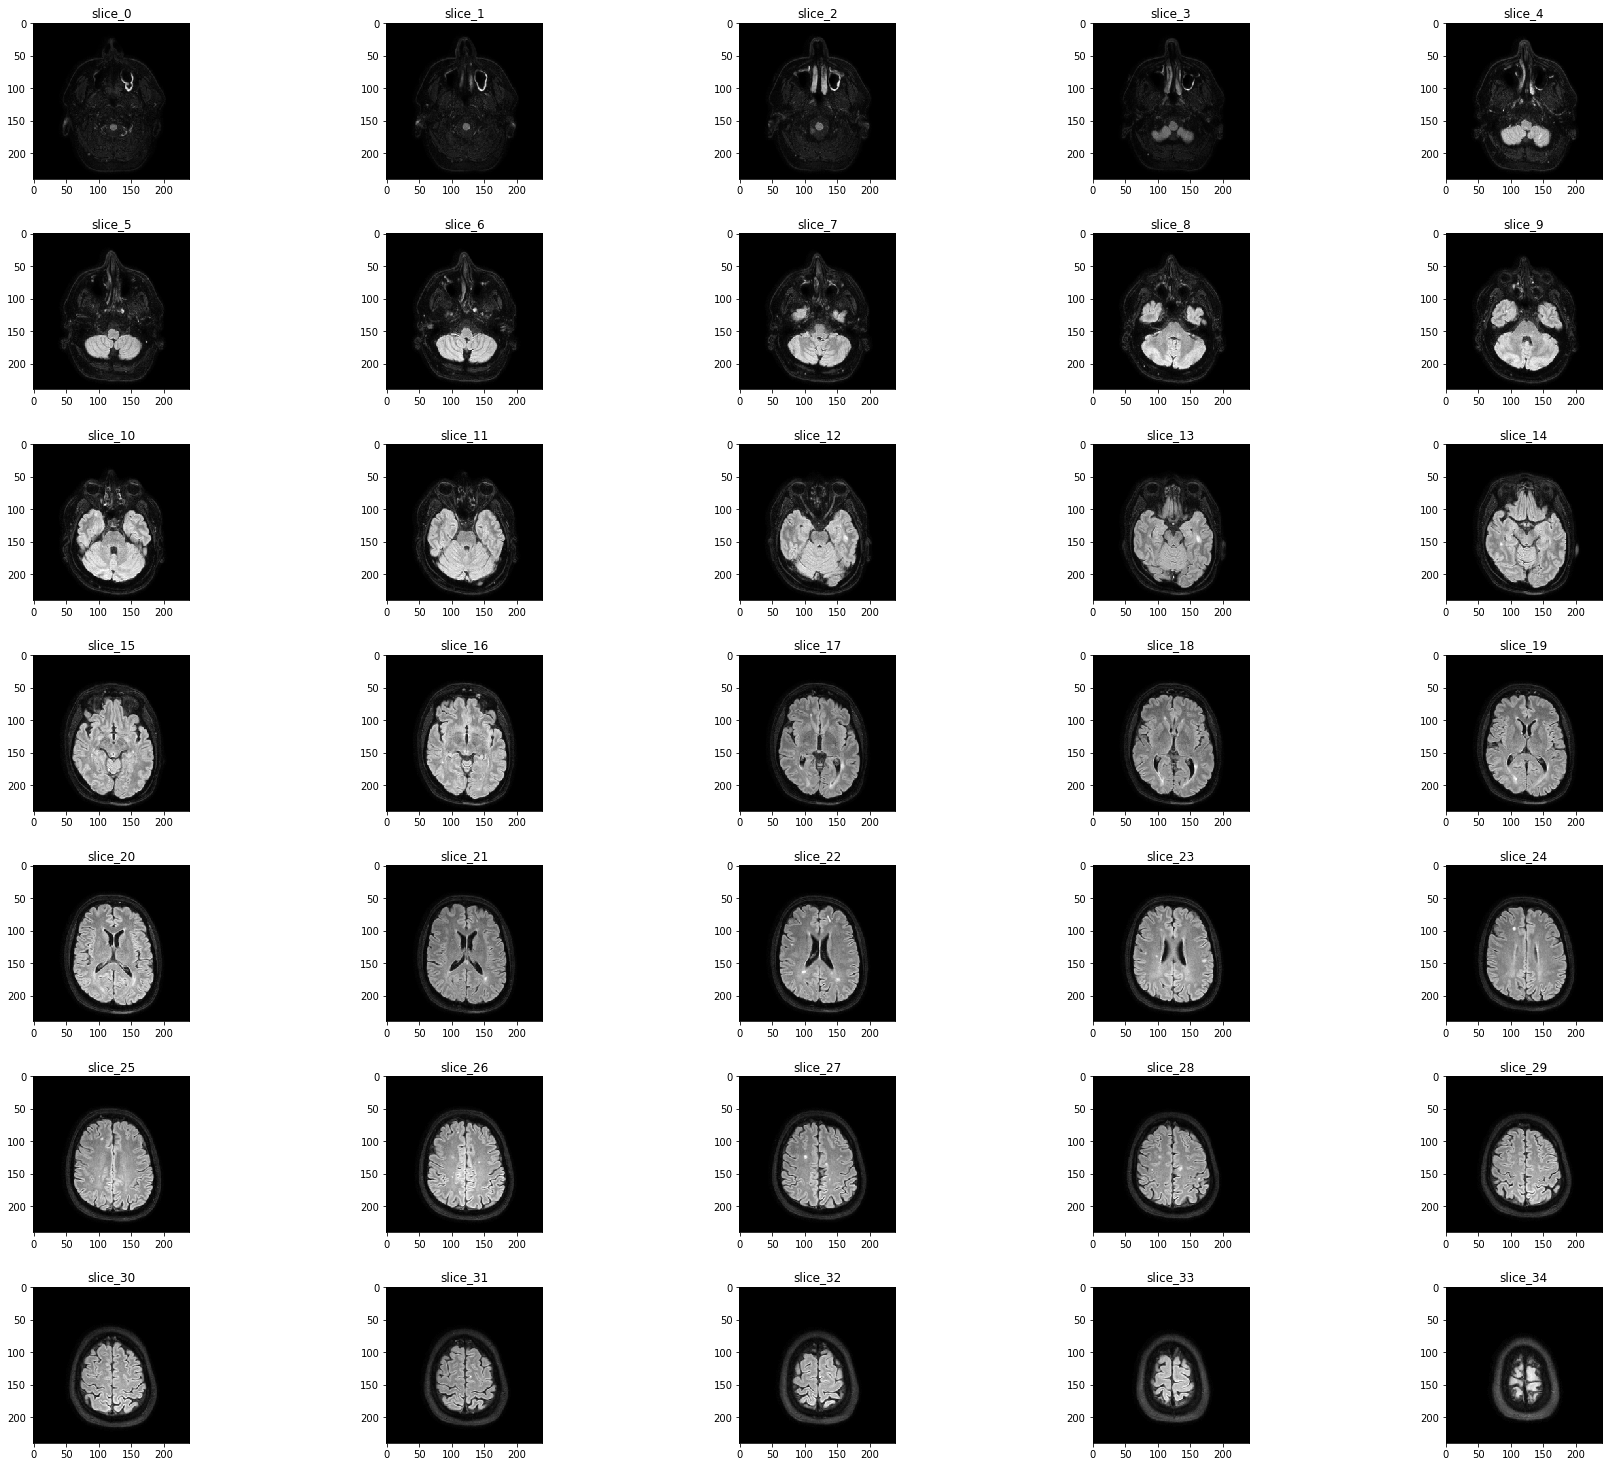

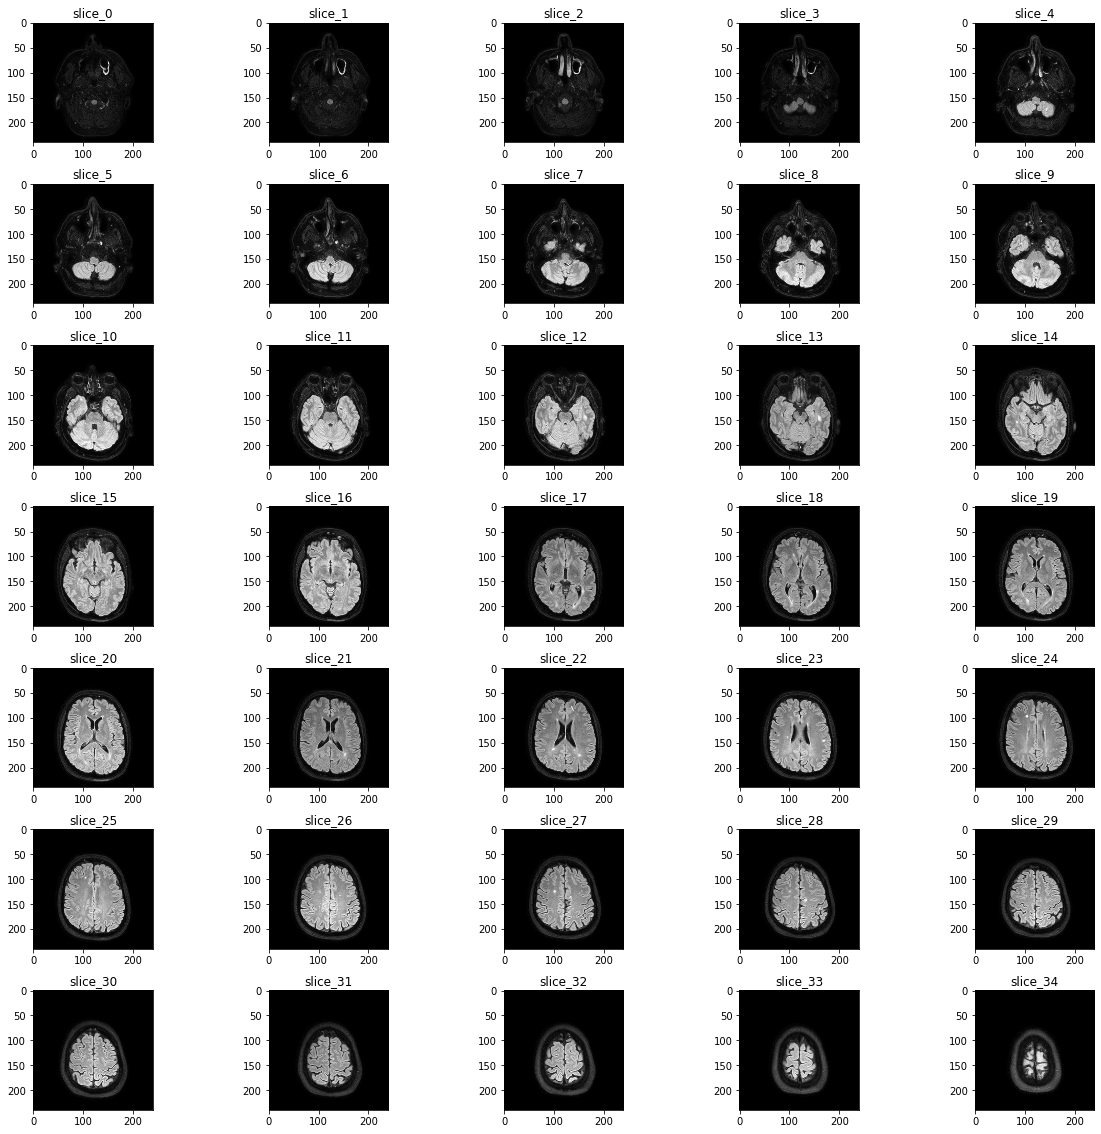

In [210]:
fig = plt.figure(figsize=(20,20))

for n, image in enumerate(image_3d):
    ax = fig.add_subplot(7, 5, n+1)
    ax.imshow(image, cmap='gray')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35)
    plt.title("slice_" + str(n))

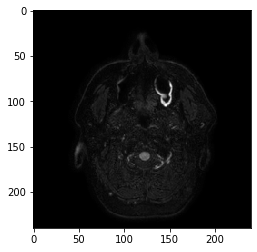

In [187]:
plt.imshow(image_3d[0], cmap='gray')
plt.show()

In [98]:
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

Patient id.......: 0080008
Modality.........: MR
Study Date.......: 20150325


In [99]:
if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)


Image size.......: 240 x 240, 115200 bytes
Pixel spacing....: ['1.04166660308837', '1.04166660308837']


In [100]:
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

Slice location...: 3549.66258797736


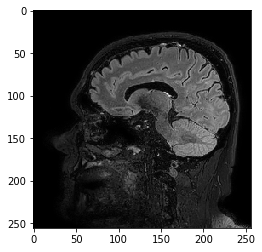

In [106]:
plt.imshow(dataset.pixel_array, cmap='gray')
plt.show()

In [198]:
'Slice_' + str(n)

'Slice_0'

In [94]:
dataset[0x2001, 0x1018]

(2001, 1018) [Number of Slices MR]               SL: 365

In [90]:
hex(5001)

'0x1389'

In [150]:

for file in main_file:
    print(len(glob.glob(file + '/*.dcm')), file.split('/')[-2])

35 12916
365 10285
365 11303
261 10061
10 13058
46 10564
364 10823
271 13054
365 10222
277 12729
365 10125
224 12230
365 10874
140 13093
224 12794
277 12714
224 12964
277 12849
277 12229
176 100124
365 10244
24 10187
14 13068
224 12798
365 10189
176 101772
365 10714
10 13149
365 11297
140 10058
277 12752
365 10149
224 12181
27 10578
261 13097
46 10040
276 12666
160 12317
83 101083
224 12802
277 12886
261 10589
277 12775
277 12383
365 11111
46 10097
24 10073
40 13090
277 12289
46 13102
277 12260
40 12927
277 12745
355 10641
365 11351
277 12789
277 12869
11 13061
224 12812
160 12295
310 12920
27 10075
277 12820
35 12924
27 10572
248 10441
140 13145
365 10769
86 101124
224 12205
365 10214
277 12203
277 12314
277 12889
364 10981
361 11245
24 10065
277 12304
46 10043
276 12241
160 10036
365 10330


In [149]:
'../JFRDataChallenge/jfr/Dataset 1/12916/'.split('/')

['..', 'JFRDataChallenge', 'jfr', 'Dataset 1', '12916', '']

In [185]:
dataset.InstanceCreationDate

dataset.PatientID
dataset.PatientBirthDate
dataset.PregnancyStatus
dataset.AcquisitionDate
dataset.PatientWeight
dataset.PatientSex

dataset.MRAcquisitionType
dataset.SliceThickness

"1"

In [59]:
"""
- What is Slice Thickness
- What is spacing between slices
- What's the deal with Acquisition Contrast and 
- Difference between (3D Flair et axial T2 Flair)
- Est-ce que c'est normal de faire la suivi d'un patient avec
des image ayant des modalités differnet ?
"""

''

In [77]:
lr_drop = 0.5
lr_drop_epochs = [10,20,30,40,50,60]

def step_decay(epoch):
    
    for n, _ in enumerate(lr_drop_epochs):
        
        if epoch <= lr_drop_epochs[0]:
            return 1e-4 
        
        elif epoch > lr_drop_epochs[n] and epoch <= lr_drop_epochs[n+1]:
            return 1e-4 * lr_drop**(n+1)
        
        elif epoch > lr_drop_epochs[-1]:
            return 1e-4 * lr_drop**(len(lr_drop_epochs))
        
        else:
            continue

In [86]:
step_decay(75)

1.5625e-06

In [13]:
25> 10 and 25 <= 33

True